# Project: Investigation of dataset No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project we have chosen to investigate a No-show Appointments dataset. The dataset contains information collected from some 110,000 medical appointments in Brazil. Around 20 percent of patients do not show up for their appointment (marked as No-show in the dataset). We wish to know why this happens so frequently, and so our main focus will be on No-shows - our _dependent_ variable. Luckily we have a number of factors that may help us in finding out what affects whether a patient does not turn up for his/her appointment. Hence, these factors are our _independent_ variables. They are:

*    ‘scheduled_day’ tells us on what day the patient set up their appointment.
*    ‘appointment_day’ tells us the date of the appointment.
*    ‘age’ tells us the age of the patient.
*    ‘neighborhood’ tells us the location of the hospital.
*    ‘scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia "Read more about Bolsa Familia at Wikipedia").
*    ‘hypertension’ indicates whether or not the patient suffers from hypertension.
*    ‘diabetes’ indicates whether or not the patient is diagnosed with diabetes.
*    ‘alcoholism’ indicates whether or not the patient is diagnosed with alcoholism.
*    ‘handicap’ indicates whether or not the patient is diagnosed with any handicap.
*    ‘sms_received’ indicates whether or not the patient has received sms reminder.

We will add a few calculated columns as well:
*    ‘day_of_appointment’ tells us whether the appointment time was on a Monday, Tuesday etc.
*    ‘sch_days_inadv’ tells us how many days in advance the appointment had been scheduled.
*    ‘sch_sameday’ indicates whether or not the patient scheduled the appointment the same day as the appointment itself.
*    ‘gender_is_woman’ indicates whether the patient is a woman. If it is False, it means the patient is a man.
*    ‘handicap_bool’ indicates whether a patient has any handicap or not.

After our investigation we will conclude with answers to the following questions:

*    What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? Does sms-reminders work?
*    Is there any correlation between age of the patient and how far ahead the appointment was scheduled?
*    Is there a day of the week when the age distribution of the patients is different?

    

<a id='wrangling'></a>
## Data Wrangling

### General Properties

First, let us import the packages that we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

And we set a max limit on the number of rows we wish to display as output.

In [2]:
pd.set_option('display.max_rows', 17)

Now we load the data and have a look at the first few rows of our dataset.

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


At first glance it looks like we should correct some typos in the headings and probably streamline the formatting.

Now let us get an overview of the data and data types:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
type(df['Gender'][0])

str

In [6]:
type(df['ScheduledDay'][0])

str

In [7]:
type(df['AppointmentDay'][0])

str

In [8]:
type(df['Neighbourhood'][0])

str

In [9]:
type(df['No-show'][0])

str

We need to fix some of the data types. PatientID probably should not be a float but rather a string. AppointmentID could also be a string. For Gender we could rather use the category data type. ScheduledDay and AppointmentDay should be changed to datetime. Hypertension, Diabetes, Alcoholism, Handicap, SMS_received, No-show all sound like they could be boolean.

Now, let us see how many unique values are in each column:

In [10]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

We observe that the number of unique AppointmentIDs is 110,527, the same as the total number of entries. This means, as one would expect, that each recorded appointment has a unique ID.

Hypertension, Diabetes, Alcoholism, SMS_received and No-show still appear like they could be transformed to boolean format.

Handicap, however, have 5 different values. Let us have a closer look:

In [11]:
df.groupby('Handcap').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show
Handcap,,,,,,,,,,,,,
0,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286,108286
1,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042,2042
2,183,183,183,183,183,183,183,183,183,183,183,183,183
3,13,13,13,13,13,13,13,13,13,13,13,13,13
4,3,3,3,3,3,3,3,3,3,3,3,3,3


What do these 5 values (0, 1, 2, 3, 4) mean? Some digging in discussion thread at Kaggle yielded an answer. There the creator of the dataset confirms: "... the handcap refers to the number of disabilites a person has. For example, if the person is blind and can't walk the total is 2." To simplify we can consider converting this to a boolean; True: any handicap, False: no handicap.

Next, let us check for duplicates:

In [12]:
sum(df.duplicated())

0

Our dataset does not contain any duplicates.

Now let us see if there are any missing data:

In [13]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

Our dataset does not contain missing data.

Next, let us see if there are any outliers.

In [14]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We see that the average age among patients is 37 years, and the ages are in the range from -1 to 115 years. Seems like we have at least one outlier with -1 that we need to deal with.

We can also see from the mean of each boolean value what their ratio of occurrence is: Scholarship (9.8 %), Hypertension (19.7 %), Diabetes (7.2 %), Alcoholism (3.0 %), SMS_received (32.1 %).

The distribution of ages are as follows:

In [15]:
df.groupby('Age').count()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
Age,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,1,1,1
0,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539,3539
1,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273,2273
2,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618,1618
3,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513,1513
4,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299,1299
5,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
6,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521,1521
...,...,...,...,...,...,...,...,...,...,...,...,...,...


We see that there is one person with age -1, which seems like an error, hence we will remove that outlier later. 

There is also something going on in the high end of the scale. Apart from the five(!) 115 year olds the highest age in our dataset is 102 years. Clearly, we can remove the 115 year outliers as well.

This concludes our initial inspection and observations of the dataset.

### Data Cleaning

Based on aforementioned observations we now perform the necessary steps to clean the data.

We start with the headings, where we first streamline by converting to lowercase letters:

In [16]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [17]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Better, but we also wish to correct typos and improve readability, so we do the following to rename some columns:

In [18]:
df.rename(columns={"patientid": "patient_id", "appointmentid": "appointment_id", "scheduledday": "scheduled_day", "appointmentday": "appointment_day", "neighbourhood": "neighborhood", "hipertension": "hypertension", "handcap": "handicap"},inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now the headings look good. 

Next we need to fix the data types.

We start by changing the type to integer for patient_id:

In [19]:
df['patient_id'] = df['patient_id'].astype(np.int64).astype(str)

In [20]:
df['appointment_id'] = df['appointment_id'].astype(str)

Next, we change the type to category for gender:

In [21]:
df['gender'] = df['gender'].astype('category')

We create a calculated column for 'day_of_appointment'.

In [22]:
df['day_of_appointment'] = pd.to_datetime(df['appointment_day']).dt.day_name()

We verify

In [23]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


Indeed 'day_of_appointment' is added with seemingly correct values.

Next we change scheduled_day and appointment_day to datetime format:

In [24]:
df['scheduled_day'] = pd.to_datetime(df['scheduled_day']).dt.date
df['appointment_day'] = pd.to_datetime(df['appointment_day']).dt.date

Further we change the data type for 'no-show' to boolean with applied mapping:

In [25]:
mapping = {'Yes': True, 'No': False}
df['no_show'] = df['no_show'].map(mapping)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,False,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,False,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,False,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,False,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,False,Friday


Next, scholarship, hypertension, diabetes, alcoholism and sms_received can be changed to type boolean:

In [26]:
columns_01 = ['scholarship', 'hypertension', 'diabetes', 'alcoholism', 'sms_received']
mapping = {0: False, 1: True}
for x in columns_01:
    df[x] = df[x].map(mapping)

In [27]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,Friday
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,Friday
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,Friday
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,Friday
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,Friday


Good, they have turned boolean - let us also check the datatypes:

In [28]:
df.dtypes

patient_id              object
appointment_id          object
gender                category
scheduled_day           object
appointment_day         object
age                      int64
neighborhood            object
scholarship               bool
hypertension              bool
diabetes                  bool
alcoholism                bool
handicap                 int64
sms_received              bool
no_show                   bool
day_of_appointment      object
dtype: object

They are indeed of boolean data type now.

In [29]:
type(df['scheduled_day'][0])

datetime.date

In [30]:
type(df['appointment_day'][0])

datetime.date

Now our data types make much more sense in relation to the data.

Next we will remove the outliers in the 'age' column. 
First, we create variables to hold the indexes of the extreme values; those under 0 years and those over 102 years.

In [31]:
rem1 = df[df['age'] < 0].index
rem2 = df[df['age'] > 102].index

We then drop them

In [32]:
df.drop(rem1 , inplace=True)
df.drop(rem2 , inplace=True)

We verify the outliers have been removed:

In [36]:
df.describe()

,age,handicap
count,110521.000000,110521.000000
mean,37.085694,0.022213
std,23.104606,0.161440
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,0.000000
75%,55.000000,0.000000
max,102.000000,4.000000


Outliers were indeed removed, and the row count was reduced by six, as expected, to 110,521.

The minimum age is now 0 and the maximum age is 102.

### Adding more columns and removing more outliers

Before we dive into exploratory data analysis and our research questions, we will add some columns that may help us in exploring.

First we add the time delta between scheduling and appointment as a new column 'sch_days_inadv'

In [37]:
df['sch_days_inadv'] = df['appointment_day'] - df['scheduled_day']

We verify there is a new column

In [38]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,Friday,0 days
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,Friday,0 days
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,Friday,0 days
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,Friday,0 days
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,Friday,0 days


The column 'sch_days_inadv' was indeed added. Let us extract the days from this timedelta which should give us data type 'integer' in this column.

In [39]:
df['sch_days_inadv'] = df['sch_days_inadv'].dt.days

We also set it to type integer, to be sure, and verify

In [40]:
df.astype({'sch_days_inadv': np.int64}).dtypes

patient_id              object
appointment_id          object
gender                category
scheduled_day           object
appointment_day         object
age                      int64
neighborhood            object
scholarship               bool
hypertension              bool
diabetes                  bool
alcoholism                bool
handicap                 int64
sms_received              bool
no_show                   bool
day_of_appointment      object
sch_days_inadv           int64
dtype: object

We use the groupby() function to check out the distinct values in our new column.

In [41]:
df.groupby('sch_days_inadv').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment
sch_days_inadv,,,,,,,,,,,,,,,
-6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
-1,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
0,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561
1,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213,5213
2,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725,6725
3,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735
4,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290,5290
5,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277,3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


Apparently we need to remove some outliers here as well, namely the negative values.

In [42]:
rem = df[df['sch_days_inadv'] < 0].index

In [43]:
df.drop(rem , inplace=True)

We verify

In [44]:
df.describe()

,age,handicap,sch_days_inadv
count,110516.000000,110516.000000,110516.000000
mean,37.085861,0.022196,10.184272
std,23.104465,0.161390,15.255201
min,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000
50%,37.000000,0.000000,4.000000
75%,55.000000,0.000000,15.000000
max,102.000000,4.000000,179.000000


The negative values were indeed dropped. 

To be able to address the question of whether a patient more frequently turns up at the appointments scheduled on the same day as the appointment itself we add a column 'sch_sameday' which will be boolean.

First we add the column with all values as True (just as an initial step)

In [45]:
df['sch_sameday'] = True

Then we set the values to False whereever 'sch_days_inadv' is greater than zero.

In [46]:
df.loc[df.sch_days_inadv > 0, 'sch_sameday'] = False

We verify that boolean values are present in the column 'sch_sameday'

In [47]:
df.groupby('sch_sameday').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv
sch_sameday,,,,,,,,,,,,,,,,
False,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955,71955
True,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561,38561


The 'sch_sameday' column does indeed contain boolean values now, and we notice that a significant portion of the appointments were scheduled on the same day (a little more than one third).

Since we have so many boolean variables in our dataset, we will add two more boolean columns: 
*    One which indicates whether the patient is a woman. We will name this column 'gender_is_woman'.
*    One which indicates whether or not a patient has any handicap. We name this column 'handicap_bool'.

In [48]:
mapping = {'F': True, 'M': False}
df['gender_is_woman'] = df['gender'].map(mapping)

We verify that boolean values are present in the column 'gender_is_woman'

In [49]:
df.groupby('gender_is_woman').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv,sch_sameday
gender_is_woman,,,,,,,,,,,,,,,,,
True,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831,71831
False,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685,38685


In [50]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv,sch_sameday,gender_is_woman
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,0,False,False,Friday,0,True,True
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,0,False,False,Friday,0,True,False
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,0,False,False,Friday,0,True,True
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,0,False,False,Friday,0,True,True
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,0,False,False,Friday,0,True,True


Since we have so many boolean variables in our dataset, we will add column which will tell us whether or not a patient has any handicap. We name this column 'handicap_bool'.

In [51]:
mapping = {1: True, 2: True, 3: True, 4: True, 0: False}
df['handicap_bool'] = df['handicap'].map(mapping)

We verify

In [52]:
df.groupby('handicap_bool').count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv,sch_sameday,gender_is_woman
handicap_bool,,,,,,,,,,,,,,,,,,
False,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281,108281
True,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235


Handicap_bool does indeed contain boolean values now. Around 2 % of patients have one or more handicaps.

That concludes our data wrangling.

<a id='eda'></a>
## Exploratory Data Analysis

As we perform our exploratory data analysis we will compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction. 

First, let us look at some histograms and other plots which will indicate the distribution of our variables.

,age
count,110516.000000
mean,37.085861
std,23.104465
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,102.000000


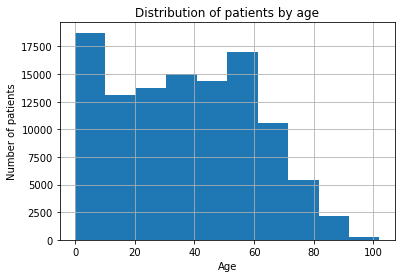

In [53]:
ax = df['age'].hist()
ax.set_ylabel('Number of patients')
ax.set_xlabel('Age')
ax.set_title('Distribution of patients by age')
pd.DataFrame(df['age'].describe())

From histogram for the 'age' variable we see that there is a high count of patients 0-10 years old. Not surprising as babies are in this group and might need vaccination etc. Then it seems people a healthy as teenagers and you adults. Then it increases gradually till they are around 60 years old. Naturally, after this that are fewer and fewer patients, as we move towards old age, and an increasing number of potential patients will no longer be among the living.

Let us now explore the gender distribution

,gender
F,0.64996
M,0.35004


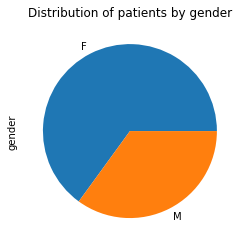

In [64]:
ax = df['gender'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by gender')
pd.DataFrame(df['gender'].value_counts()/df['gender'].value_counts().sum())

Looking at the 'gender' variable, here in a pie chart, it is clear that we have more female patients than male; almost 2:1.

Next, we explore 'scholarship', which indicates whether the patient were part of the welfare program

,scholarship
False,0.901725
True,0.098275


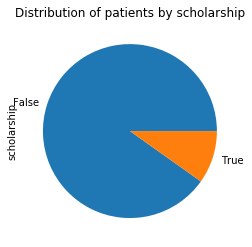

In [65]:
ax = df['scholarship'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by scholarship')
pd.DataFrame(df['scholarship'].value_counts()/df['scholarship'].value_counts().sum())

About 10 % of patients do have scholarship.

Next we look at the variable 'hypertension'

,hypertension
False,0.802743
True,0.197257


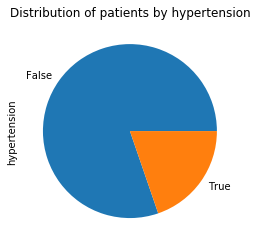

In [66]:
ax = df['hypertension'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by hypertension')
pd.DataFrame(df['hypertension'].value_counts()/df['hypertension'].value_counts().sum())

Around 20 % of patient suffer from hypertension.

Next we look at the variable 'diabetes'

,diabetes
False,0.928128
True,0.071872


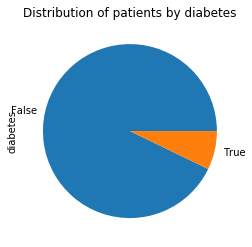

In [67]:
ax = df['diabetes'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by diabetes')
pd.DataFrame(df['diabetes'].value_counts()/df['diabetes'].value_counts().sum())

Around 7 % of patients suffer from diabetes

Next we look at the variable 'alcoholism', ie. whether a patient suffer from alcoholism

,alcoholism
False,0.969597
True,0.030403


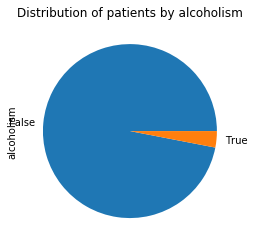

In [68]:
ax = df['alcoholism'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by alcoholism')
pd.DataFrame(df['alcoholism'].value_counts()/df['alcoholism'].value_counts().sum())

Only 3 % of patients suffer from alcoholism.

Next we look at the variable 'handicap'

,handicap
0,0.979777
1,0.018423
2,0.001656
3,0.000118
4,0.000027


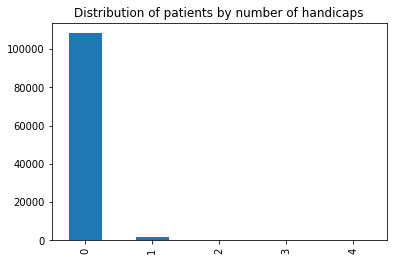

In [69]:
ax = df['handicap'].value_counts().plot(kind='bar')
ax.set_title('Distribution of patients by number of handicaps')
pd.DataFrame(df['handicap'].value_counts()/df['handicap'].value_counts().sum())

98 % of patients do not have any handicap, while 1.8 % have one handicap, 0.17 % have two handicaps, 0.012 % have three handicaps and 0.0027 % have four handicaps.

Next, let is look at the variable 'no_show'

,no_show
False,0.79812
True,0.20188


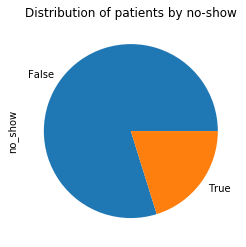

In [70]:
ax = df['no_show'].value_counts().plot(kind='pie')
ax.set_title('Distribution of patients by no-show')
pd.DataFrame(df['no_show'].value_counts()/df['no_show'].value_counts().sum())

20.2 % of patients misses their appointment.

Now that we have some general overview, we will explore the "no-shows" further and look into what factors might affect whether a patient misses the appointment. To do this, we start by creating a DataFrame 'df_noshow', which contains only the subset of no-shows.

In [71]:
df_noshow = df[df['no_show'] == True]

In [72]:
x = df_noshow.shape[0]
x

22311

In [73]:
y = df.shape[0]
y

110516

'df_noshow' contains 22,311 rows of data, while 'df' has 110,516,

Overall fraction of no-shows

In [74]:
no_show_frac = x/y

print(f"{no_show_frac:.1%}")

20.2%


This verifies what we found from the full dataset and the value_counts() function earlier: That the overall fraction of "no-shows" is 20.2 %.

Now, we will find the fraction of no-shows among patients *given* that a certain factor is true.

For this we will loop through our list of 'bool_factors' names and create a list of corresponing values, 'bool_factors_noshow_frac'. We will print the values too.

Finally we will zip our lists together as a dictionary, 'dict_noshow'.

In [75]:
bool_factors = ['gender_is_woman', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap_bool', 'sms_received', 'sch_sameday']

bool_factors_noshow_frac = []

for factor in bool_factors:
    # Creating DataFrame 'df_factor' where given factor is true
    df_factor = df[df[factor] == True]
    
    # Counting the number of no-shows in 'df_factor'
    a = df_factor[df_factor['no_show'] == True].count()[0]
    
    # Counting the total number of rows in 'df_factor'
    b = df_factor.shape[0]
    
    # Calculating the no-show ratio and appending it to our list of values
    no_show_frac_factor = a / b
    no_show_frac_factor
    bool_factors_noshow_frac.append(no_show_frac_factor)
    
    # Printing the no-show ratio for given factor
    print("\nFraction of no-shows given " + factor + ":")
    print(f"{no_show_frac_factor:.1%}")

# Zipping our lists together as a dictionary
dict_noshow = dict(zip(bool_factors, bool_factors_noshow_frac))


Fraction of no-shows given gender_is_woman:
20.3%

Fraction of no-shows given scholarship:
23.7%

Fraction of no-shows given hypertension:
17.3%

Fraction of no-shows given diabetes:
18.0%

Fraction of no-shows given alcoholism:
20.1%

Fraction of no-shows given handicap_bool:
18.0%

Fraction of no-shows given sms_received:
27.6%

Fraction of no-shows given sch_sameday:
4.6%


Compared to the full dataset, where the no-show ratio was 20.2 %, we see that only the subsets of 'scholarship' and 'sms_received' have a higher ratio. 

We verify that our dictionary contains keys and values as expected

In [76]:
dict_noshow

{'gender_is_woman': 0.203087803316117,
 'scholarship': 0.2373630420771568,
 'hypertension': 0.1730275229357798,
 'diabetes': 0.18003273322422259,
 'alcoholism': 0.20148809523809524,
 'handicap_bool': 0.17986577181208055,
 'sms_received': 0.27575322003325725,
 'sch_sameday': 0.04647182386348902}

Indeed it does.

### Research Question 1: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? (And does sms-reminders work?)

We will create a plot of normalized no-show ratios to address this question.

We create lists for keys and values respectively from our dictionary.

In [77]:
no_show_keys = list(dict_noshow.keys())

In [78]:
no_show_values = np.asarray(list(dict_noshow.values()))

To be able to compare, we normalize the values:

In [79]:
no_show_values_norm = no_show_values/no_show_frac
no_show_values_norm

array([1.00598143, 1.17576146, 0.8570799 , 0.89177973, 0.99805739,
       0.8909527 , 1.36592456, 0.23019497])

Note: Normalized values close to 1 means small deviation from the overall no-show ratio of the full dataset.

Then we subtract 1 and take the absolute value to be able to rank by degree of deviation.

In [80]:
no_show_values_abs_rel_diff = np.absolute(no_show_values_norm - 1)
no_show_values_abs_rel_diff

array([0.00598143, 0.17576146, 0.1429201 , 0.10822027, 0.00194261,
       0.1090473 , 0.36592456, 0.76980503])

We create a pandas DataFrame and display it ranked by absolute relative difference

In [81]:
data = list(zip(no_show_keys, no_show_values_norm, no_show_values_abs_rel_diff))
  
df_table = pd.DataFrame(data, columns = ['Variable', 'No-show ratio normalized', 'Absolute relative diff (desc)']) 

df_table.sort_values(by=['Absolute relative diff (desc)'], ascending=False)

,Variable,No-show ratio normalized,Absolute relative diff (desc)
7,sch_sameday,0.230195,0.769805
6,sms_received,1.365925,0.365925
1,scholarship,1.175761,0.175761
2,hypertension,0.857080,0.142920
5,handicap_bool,0.890953,0.109047
3,diabetes,0.891780,0.108220
0,gender_is_woman,1.005981,0.005981
4,alcoholism,0.998057,0.001943


Now we use the normalized values to create a bar plot

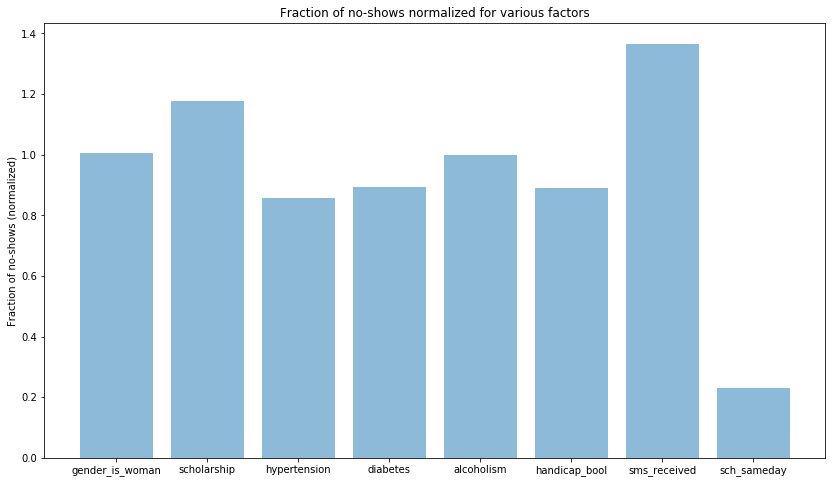

In [95]:
y_pos = np.arange(len(no_show_keys))

plt.subplots(figsize=(14,8))
plt.bar(y_pos, no_show_values_norm, align='center', alpha=0.5)
plt.xticks(y_pos, no_show_keys)
plt.ylabel('Fraction of no-shows (normalized)')
plt.title('Fraction of no-shows normalized for various factors')
plt.show()

Based on the ranked table above and our plot - the most important factor to predict if a patient will show up, by far, seems to be whether the appointment was scheduled on the same day. The ratio of no-shows is only 4.6 % in this subset, which is 77 % less than in the full dataset. So, in this group 95.4 % did show up.

Among the deceases *hypertension* seems to be the most important factor. Patients who have hypertension are less likely to miss their appointment. The ratio of no-shows is 17.3 % in this subset, which is 14 % less than in the full dataset.

Having received SMS reminder, perhaps surprisingly, actually increases the ratio of no-shows. The ratio of no-shows is 27.6 % in this subset, which is 37 % more than in the full dataset.

### Research Question 2: Is there any correlation between age of the patient and how far ahead the appointment was scheduled?

To address this question, we do a scatter plot of the 'age' variable versus the 'sch_days_inadv' variable.

Text(0.5, 1.0, 'Age vs. Days in advance')

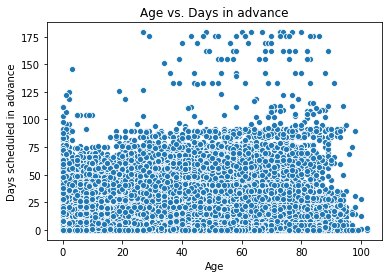

In [101]:
ax = sns.scatterplot(x="age", y="sch_days_inadv", data=df)
ax.set_ylabel('Days scheduled in advance')
ax.set_xlabel('Age')
ax.set_title('Age vs. Days in advance')

There does not seem to be any correlation between age of the patient and the number of days in advance the appointment was scheduled. 

### Research Question 3: Is there a day of the week when the age distribution of the patients is different?

Let us use a boxplot for this, where we take a look at the distribution of age for each day.

Text(0.5, 1.0, 'Age-wise distribution by day of week')

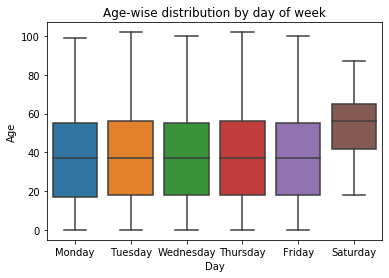

In [102]:
ax = sns.boxplot(x="day_of_appointment", y="age", data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
ax.set_ylabel('Age')
ax.set_xlabel('Day')
ax.set_title('Age-wise distribution by day of week')

There is a deviation: For Saturday the average age is higher and the upper quartile is more narrow. Also, the range is smaller. But how common is it to have a medical appointment on a Saturday? 

In [103]:
df_saturday = df[df["day_of_appointment"] == "Saturday"]
df_saturday.shape[0]

39

Right. There are very few Saturday appointments. Only 39. Then we cannot say with confidence that we think the distribution is different. 

Are Saturday appointments limited to a single neighborhood? (ie. one hospital)

In [104]:
df_saturday.groupby("neighborhood").count()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,day_of_appointment,sch_days_inadv,sch_sameday,gender_is_woman,handicap_bool
neighborhood,,,,,,,,,,,,,,,,,,
ARIOVALDO FAVALESSA,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
CARATOÍRA,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
DO QUADRO,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
SANTO ANTÔNIO,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


Occurences of Saturday appointments is limited to 4 neighborhoods (out of 81).
And 30 out of 39 such appointments were located at the local hospital of the Caratoira neighborhood.

Although we cannot claim with any strong belief that the age distribution is different on Saturdays, we cannot rule it out either. Perhaps the hospital of the Caratoira could provide more information for anyone who wants to find out the truth about this. 